## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
df=pd.read_csv(r"Bank_churn_modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Separating the categorical and continous features

In [8]:
cat=["Geography","Gender","HasCrCard","IsActiveMember","Exited"]
con=['CreditScore',"Tenure","Balance",'NumOfProducts',"EstimatedSalary","Age"]

### Dropping irrelevant column

In [9]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
print(df.shape)
df.head()

(10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Visualization

### Univariate Analysis

In [13]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

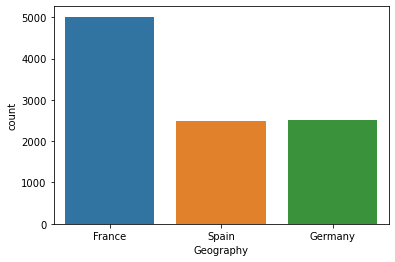

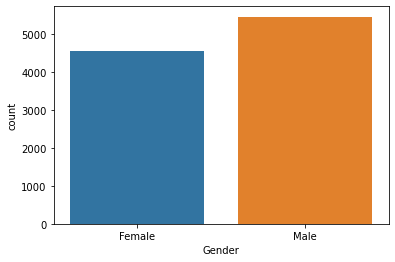

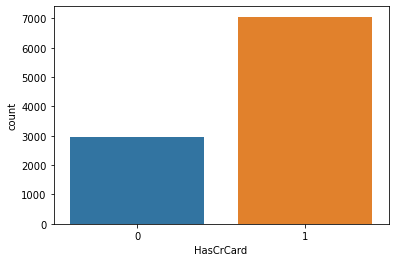

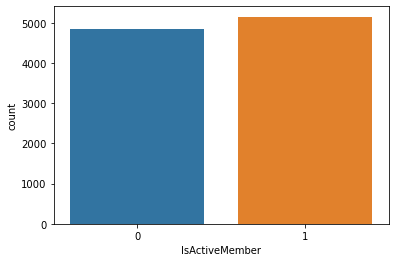

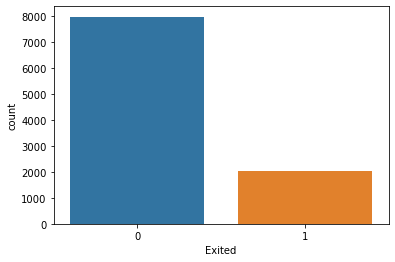

In [14]:
for i in cat:
    sns.countplot(x=i,data=df)
    plt.show()

#### Analysis:- 
1. Almost 50% of customers are from France
2. 55% of bank customers are male and 45% are female
3. 70% of bank cutomers have credit card
4. Almost 50% of customers are not actively suing bank services
5. 20% bank customers left the bank


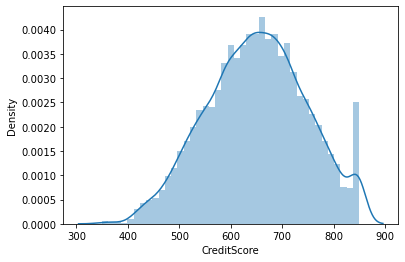

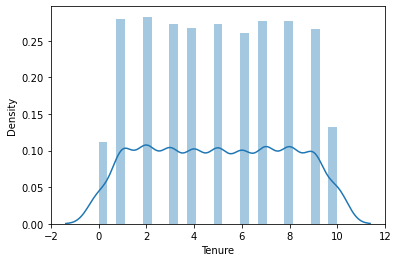

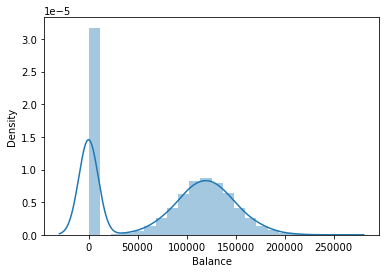

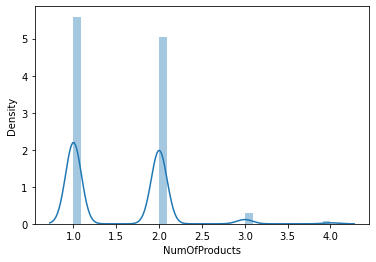

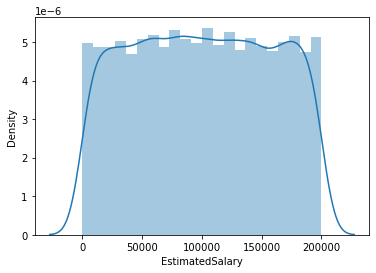

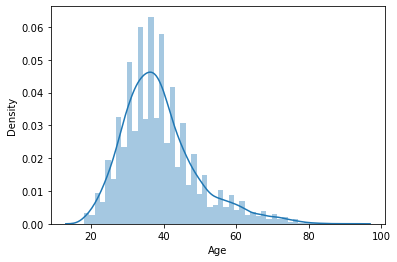

In [15]:
for i in con:
    sns.distplot(df[i])
    plt.show()

#### Analysis:-
1. Majority of bank customers have credit score between 400 to 850
2. Majority of customers have age in between 30 to 50
3. Majority of customers using 1 and 2 product of bank
4. There are two type of customer one who have bank balance 0 and other one whose bank balance between 50k to 200k

### Bivariate analysis

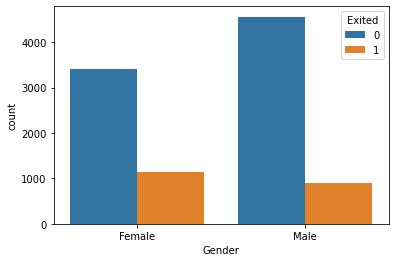

In [16]:
sns.countplot(x="Gender",hue="Exited",data=df)
plt.show()

In [17]:
out=pd.crosstab(df["Gender"],df["Exited"],margins=True)
out

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


In [18]:
out[1]/out["All"]

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Exited'>

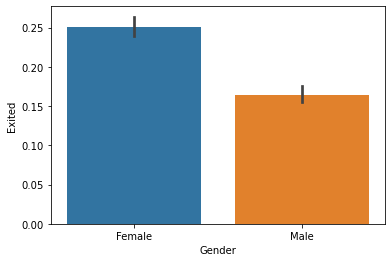

In [19]:
sns.barplot(x="Gender",y="Exited",data=df)

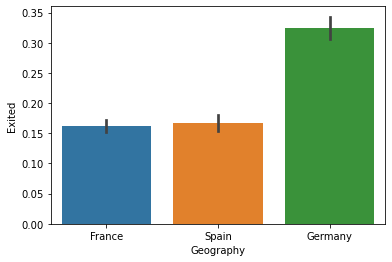

In [20]:
sns.barplot(x="Geography",y="Exited",data=df)
plt.show()

In [21]:
cat

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

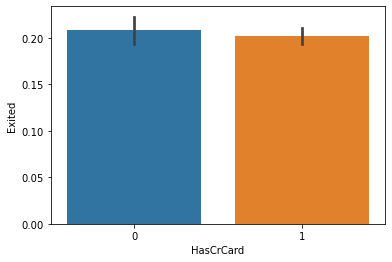

In [22]:
sns.barplot(x="HasCrCard",y="Exited",data=df)
plt.show()

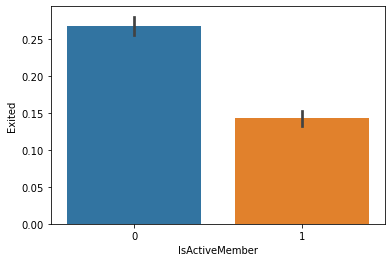

In [23]:
sns.barplot(x='IsActiveMember',y="Exited",data=df)
plt.show()

#### Analysis:
1. Germany churing rate is high
2. Churing rate is high for female
3. Churing rate difference is small for customer who have Cr.Card and don't have
4. Churing rate is high for  customers who are not activaly using bank service

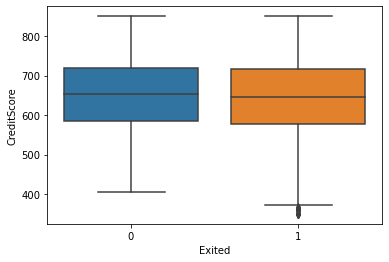

In [24]:
sns.boxplot(x="Exited",y="CreditScore",data=df)
plt.show()

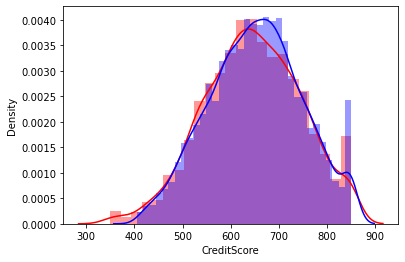

In [25]:
sns.distplot(df["CreditScore"][df["Exited"]==1],color='r')
sns.distplot(df["CreditScore"][df["Exited"]==0],color='b')
plt.show()

### Applying label encoding to the categorical features

In [26]:
df_categorical =df[["Geography","Gender","HasCrCard","IsActiveMember","Exited"]]

In [27]:
df_categorical.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In [28]:
le=preprocessing.LabelEncoder()
df_categorical=df_categorical.apply(le.fit_transform)
df_categorical.head()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,0,0,1,1,1
1,2,0,0,1,0
2,0,0,1,0,1
3,0,0,0,0,0
4,2,0,1,1,0


In [29]:
cat_cols = df_categorical.columns
df[cat_cols] = df_categorical[cat_cols]

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


### Scaling the data

In [32]:
scaler=StandardScaler()

In [33]:
df[con]=scaler.fit_transform(df[con])

In [34]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


### Splitting the train data into train and test

In [35]:
y = df["Exited"] 

In [36]:
x = df.drop(["Exited"],axis=1) 

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

### Building the model

### Using Logistic Regression

In [38]:
le = LogisticRegression()

In [39]:
le.fit(x_train,y_train)

LogisticRegression()

In [40]:
ypred = le.predict(x_test)

In [41]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2389
           1       0.57      0.16      0.25       611

    accuracy                           0.80      3000
   macro avg       0.70      0.56      0.57      3000
weighted avg       0.77      0.80      0.76      3000



In [42]:
print(confusion_matrix(y_test,ypred))

[[2316   73]
 [ 513   98]]


In [43]:
print(accuracy_score(y_test, ypred))

0.8046666666666666


### Using Decision Tree

In [44]:
dct = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [45]:
dct.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
y_pred = dct.predict(x_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2389
           1       0.81      0.21      0.33       611

    accuracy                           0.83      3000
   macro avg       0.82      0.60      0.62      3000
weighted avg       0.83      0.83      0.79      3000



In [48]:
print(confusion_matrix(y_test,y_pred))

[[2358   31]
 [ 482  129]]


In [49]:
print(accuracy_score(y_test, y_pred))

0.829


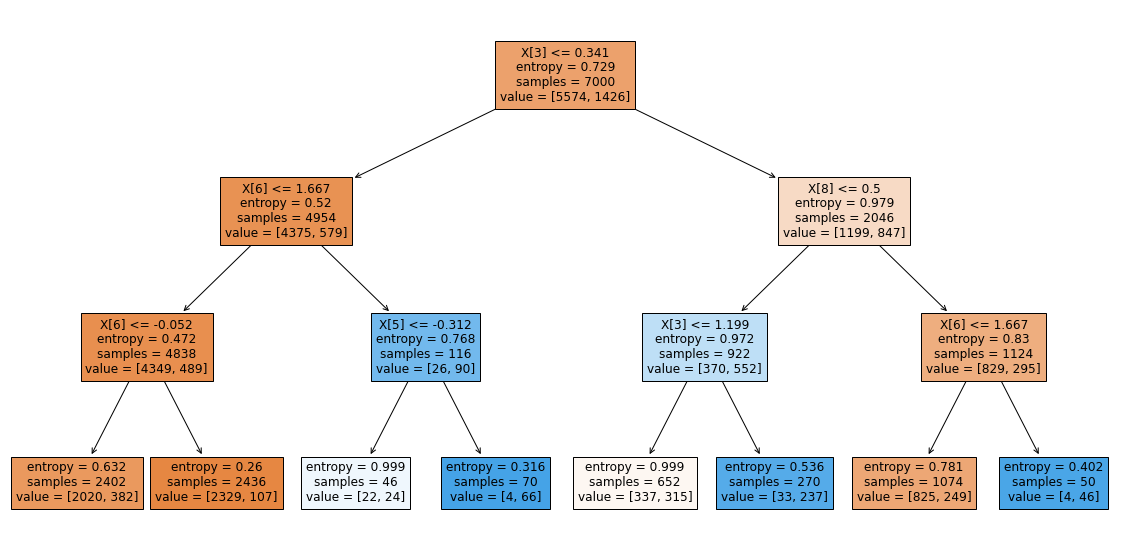

In [50]:
plt.figure(figsize=(20,10))
plot_tree(dct,filled=True)
plt.show()

### Using Random Forest Classifier

In [51]:
rf = RandomForestClassifier(n_estimators=20,criterion='entropy')

In [52]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [53]:
y_pred = rf.predict(x_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.76      0.43      0.55       611

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [55]:
print(confusion_matrix(y_test,y_pred))

[[2305   84]
 [ 350  261]]


In [56]:
print(accuracy_score(y_test, y_pred))

0.8553333333333333
